# 最大概似估計(Maximum Likelihood Estimation, MLE)
最大概似估計是透過真實觀察到的樣本資訊，反導出最有可能產生這些樣本結果的模型參數

<BarContainer object of 20 artists>

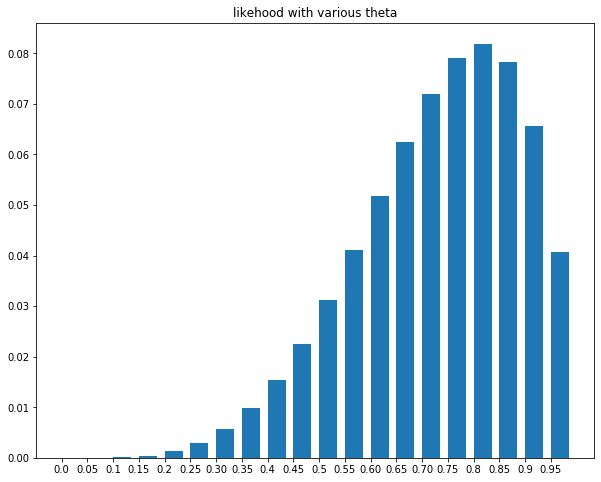

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

H = 4
T = 1

thetas = np.arange(0,1,step=0.05)
likehood = np.power(thetas,H)*np.power(1-thetas,T) 
plt.figure(figsize=(10, 8))  # width:20, height:3
plt.title("likehood with various theta")
plt.bar(thetas.astype('|S4'),likehood,align='edge',width=0.7)

<BarContainer object of 20 artists>

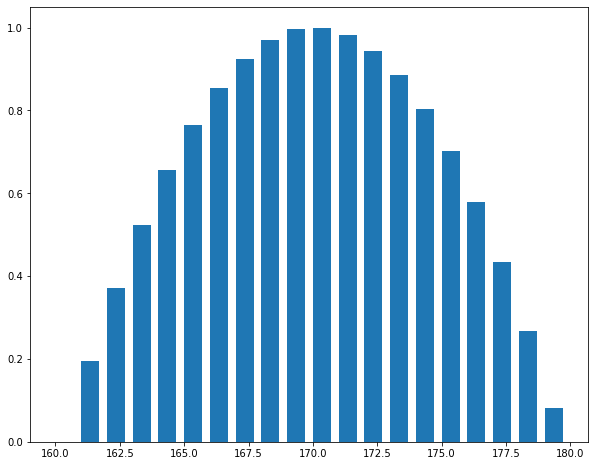

In [5]:
actual_mu = 170
actual_sigma = 3

samples = [random.gauss(actual_mu, actual_sigma) for _ in range(30)]

guess_mu = np.arange(160,180,step=1)
likehood = np.zeros(len(guess_mu))

def probability_density_function(x,mu,sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.power(np.e,-0.5*(np.power((x-mu)/sigma,2)))


for i,mu in enumerate(guess_mu):
    
    #相乘機率會太小，因此取Log變成相加
    prob = 0
    for x in samples:
         prob += np.log(probability_density_function(x,mu,actual_sigma))
    
    #為了視覺化這裡就不還原了
    #likehood[i] = np.power(np.e,prob)
    likehood[i] = prob
    
#正規化 使其值落在0-1
max_ = max(likehood)
min_ = min(likehood)
likehood = [abs((x-min_)/(max_-min_)) for x in likehood]

plt.figure(figsize=(10, 8))  # width:20, height:3
plt.bar(guess_mu,likehood,align='edge',width=0.7)